In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from keras.layers import Dense, Dropout, Activation

In [3]:
# Read Data
dataset = pd.read_csv('c2.csv')

In [4]:
# Modify Data
dataset=dataset.drop(['#', 'seismicity', 'story_num', 'disp_dir1', 'react_dir1'], axis=1)

In [5]:
# Extract data
data = dataset.iloc[:, :].values
y=data[:,8:]
X=data[:,:8]

In [6]:
# Normalize data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [7]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.15, random_state = 0)

In [89]:
# create a run model
def run_model(optim):
    model = Sequential()
    model.add(Dense(256, input_dim=8, kernel_initializer='normal'))
    model.add(Dense(120,kernel_initializer='normal', activation='relu'))

    model.add(Dense(120, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))

    model.add(Dense(50, kernel_initializer='normal',activation='relu'))
    model.add(Dense(3, kernel_initializer='normal',activation='tanh'))
        # Compile modelm

    model.compile(optimizer = optim, loss = 'mean_squared_error', metrics = ['mean_absolute_error','acc'])
    history = model.fit(X_train,
            y_train,
            batch_size=300,
            epochs=600,
            validation_split=0.15)
    
    predicted_value= model.predict(X_test)    
    return (history, predicted_value)

In [90]:
optim = ['RMSprop', 'AdaGrad', 'Adam']
hist = []
pred = []
for op in optim:
    (history, predicted_value) = run_model(op)
    hist.append(history)
    pred.append(predicted_value)

Epoch 1/600
49/49 [==============================] - 1s 11ms/step - loss: 0.0173 - mean_absolute_error: 0.0821 - acc: 0.7874 - val_loss: 0.0118 - val_mean_absolute_error: 0.0708 - val_acc: 0.7861
Epoch 2/600
49/49 [==============================] - 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0600 - acc: 0.7904 - val_loss: 0.0089 - val_mean_absolute_error: 0.0705 - val_acc: 0.7861
Epoch 3/600
49/49 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0488 - acc: 0.7904 - val_loss: 0.0059 - val_mean_absolute_error: 0.0437 - val_acc: 0.7861
Epoch 4/600
49/49 [==============================] - 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0474 - acc: 0.7904 - val_loss: 0.0063 - val_mean_absolute_error: 0.0494 - val_acc: 0.7865
Epoch 5/600
49/49 [==============================] - 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0466 - acc: 0.7908 - val_loss: 0.0058 - val_mean_absolute_error: 0.0452 - val_acc: 0.7877
Epoch 6/600
49/49 [=====

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib as mpl
def mse(pred, true): 
    return str(round(mean_squared_error(pred,true), 5))

def rscore(pred, true): 
    return str(round(r2_score(pred,true), 2)) 
# %matplotlib inline
# inline_rc = dict(mpl.rcParams)
def create_plot(data_type, modelhist, output, labels, linecolors):
    fig = plt.figure(figsize=(6, 6))
    plt.style.use('default')
    # show the plot
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # plot titile and x,y label
    plt.xlabel('Epochs', fontsize=16, fontweight='bold')
    plt.ylabel(data_type, fontsize=16, fontweight='bold')
    i = 0
    x = np.arange(0, 600, 1)
    for item in modelhist:
        y = item.history[output]
        plt.plot(x, y, color=linecolors[i], linewidth=3, label=labels[i])
        i += 1
    plt.legend()
    plt.xlim([0, 600])
    plt.tight_layout()
    plt.savefig('Figures//' + data_type + '.png', dpi=600)


def create_R_hat_plot(modelpred, y_real, output, labels, ccolor):
    fig = plt.figure(figsize=(6, 6))
    plt.style.use('default')
    i = 0
    opttype = ['RMSprop', 'AdaGrad', 'Adam']
    for item in modelpred:
        mseval = mse(item[:, output], y_real)
        r2 = rscore(item[:, output], y_real)
        lab = opttype[i] + ': ' + r"$R^2$" + " = %s" %r2 + ' , MSE = %s' %mseval
        plt.scatter (item[:, output], y_real, c=ccolor[i], edgecolors='black', label=lab)
        plt.plot(y_real, y_real, 'k-')
        i += 1
    # show the plot
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # plot titile and x,y label
    plt.xlabel(labels + ' Predicted', fontsize=16, fontweight='bold')
    plt.ylabel(labels + ' Real', fontsize=16, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('Figures//' + labels + '.png', dpi=600)

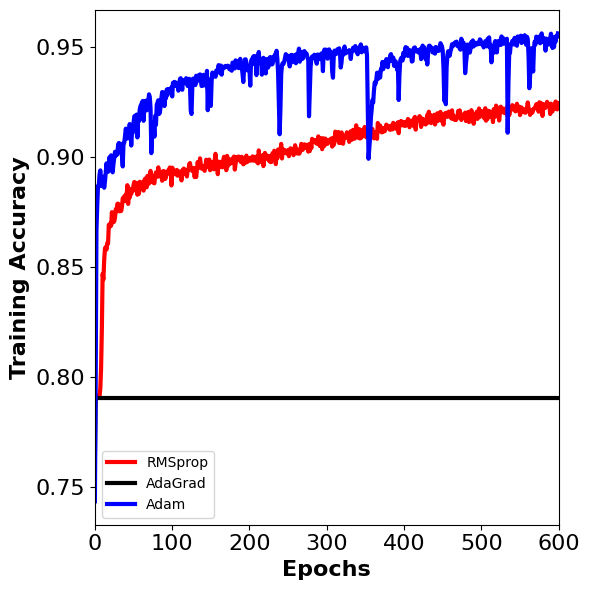

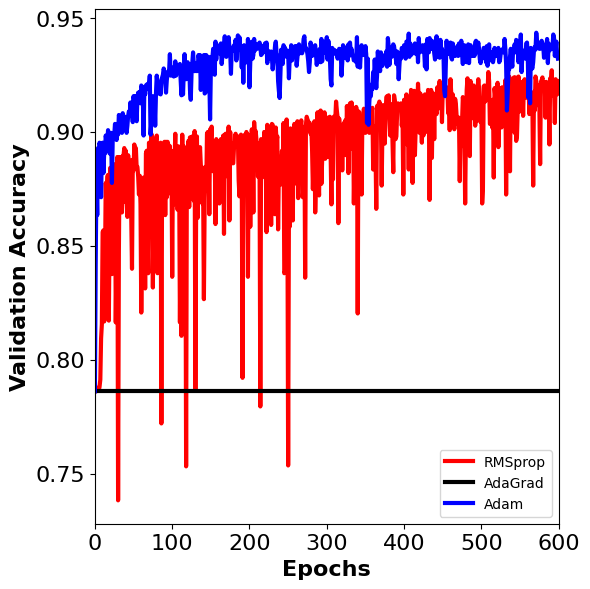

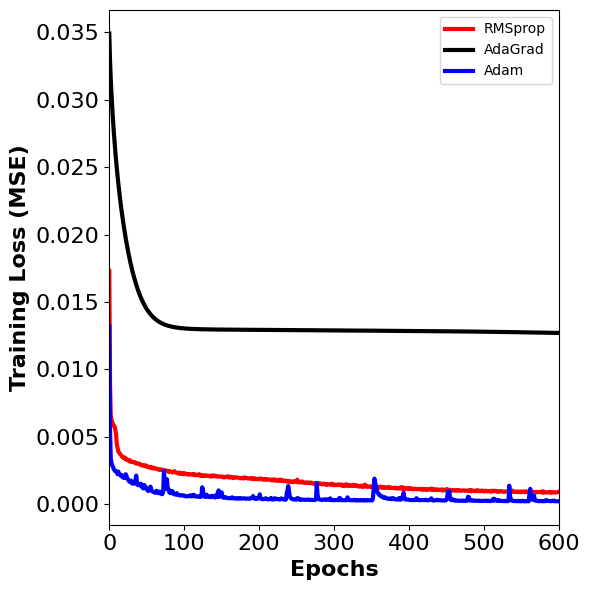

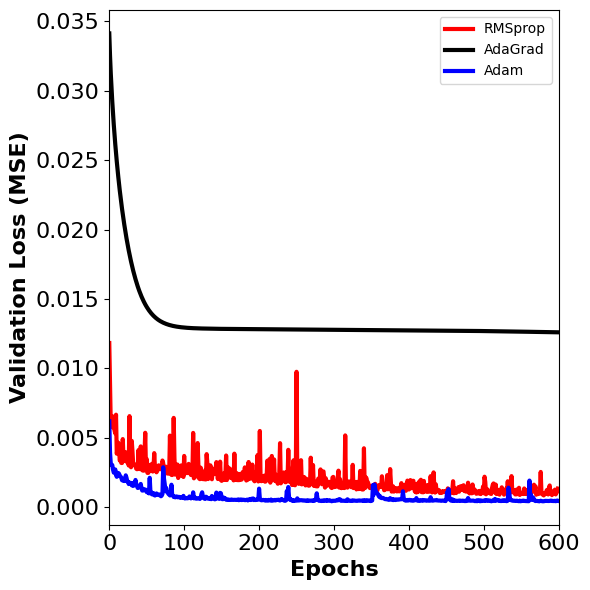

In [120]:
labels = ['RMSprop', 'AdaGrad', 'Adam']
linecolors = ['r', 'k', 'b']
output = ['acc', 'val_acc', 'loss', 'val_loss']
data_type = ['Training Accuracy', 'Validation Accuracy', 'Training Loss (MSE)', 'Validation Loss (MSE)']
for num in range(0, 4):
    create_plot(data_type[num], hist, output[num], labels, linecolors)

dict_keys(['Acceleration', 'Velcoity', 'Drift'])


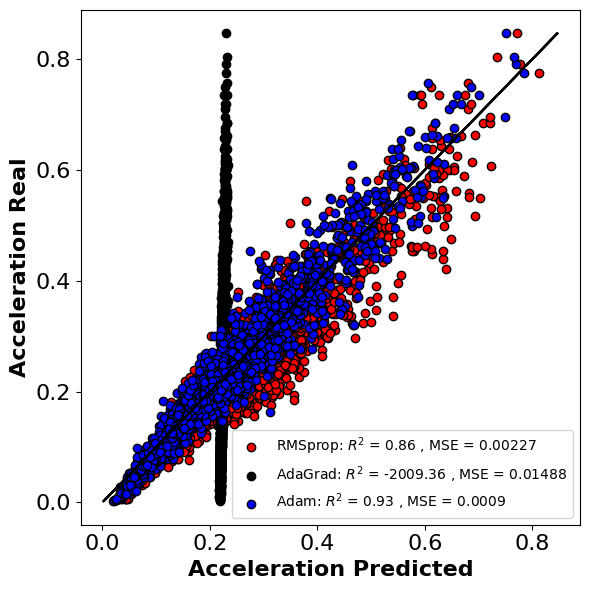

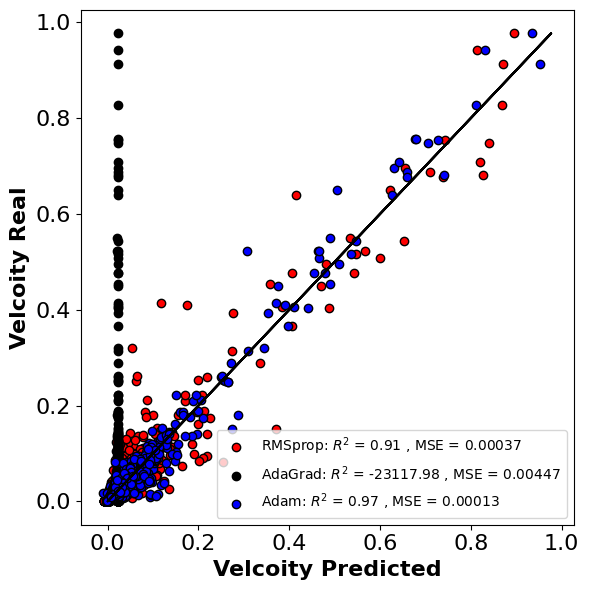

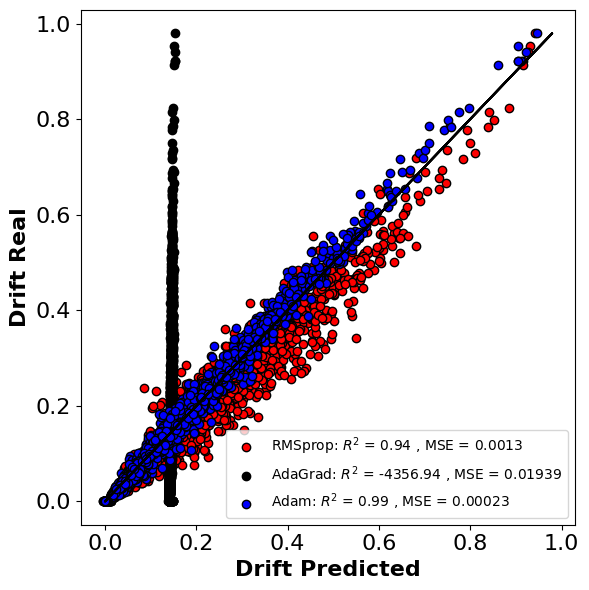

In [121]:
mydict = {'Acceleration' : 0, 'Velcoity' : 1, 'Drift' : 2}
keysList = list(mydict.keys())
print(mydict.keys())
ccolor = ['r', 'k', 'b']

for ty in keysList:
    create_R_hat_plot(pred, y_test[:,mydict[ty]], mydict[ty], ty, ccolor)